In [19]:
#Amarbold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
file = open('us_covid.csv')
dataFrame = csv.reader(file)
header = next(dataFrame) 
print(header, "\n")

cov_df = pd.read_csv('us_covid.csv')

#droping fips cause it is not necessary
cov_df.drop(["fips"], inplace=True, axis=1)
print(cov_df.head(), "\n")

#information about covid data
print(cov_df.describe(), "\n")

['date', 'state', 'fips', 'cases', 'deaths'] 

         date       state  cases  deaths
0  2020-01-21  Washington      1       0
1  2020-01-22  Washington      1       0
2  2020-01-23  Washington      1       0
3  2020-01-24    Illinois      1       0
4  2020-01-24  Washington      1       0 

              cases        deaths
count  5.539000e+04  55390.000000
mean   7.806027e+05  10824.278841
std    1.318196e+06  16256.664668
min    1.000000e+00      0.000000
25%    5.846275e+04    975.000000
50%    3.051280e+05   4465.000000
75%    9.190940e+05  13643.000000
max    1.148997e+07  99821.000000 



C:\Users\Mirage~\AppData\Local\Temp\ipykernel_36120\2214241239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca.drop(["state"], inplace=True, axis=1)
C:\Users\Mirage~\AppData\Local\Temp\ipykernel_36120\2214241239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny.drop(["state"], inplace=True, axis=1)
C:\Users\Mirage~\AppData\Local\Temp\ipykernel_36120\2214241239.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ny_rate = ny_rate.append(ny.loc[ny['date'] == "2020-09-25"], ignore_index = True)
C:\Users\Mirage~\AppData\Lo

          date  cases  deaths
5   2020-01-25      1       0
9   2020-01-26      2       0
13  2020-01-27      2       0
17  2020-01-28      2       0
21  2020-01-29      2       0
           date  cases  deaths
246  2020-03-01      1       0
261  2020-03-02      1       0
276  2020-03-03      2       0
293  2020-03-04     11       0
313  2020-03-05     22       0


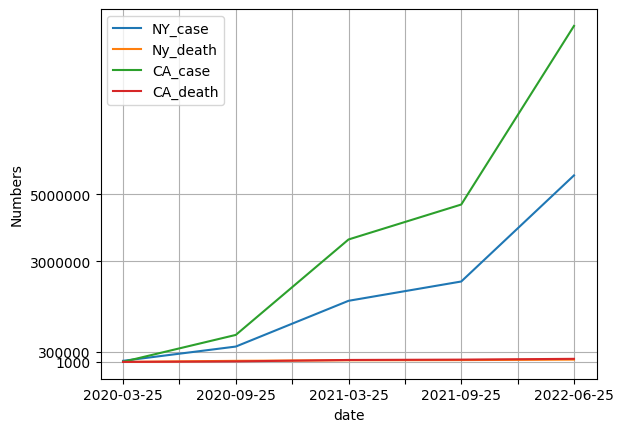

[12.843826433553764, 2.9776166607774623, 0.3159000703004274, 1.3192686685463633]
[252.1372918630223, 3.5343003167290528, 0.2854231713649212, 1.1346995929499164]
         date         ny          ca
0  2020-09-25  12.843826  252.137292
1  2021-03-25   2.977617    3.534300
2  2021-09-25   0.315900    0.285423
3  2022-06-25   1.319269    1.134700


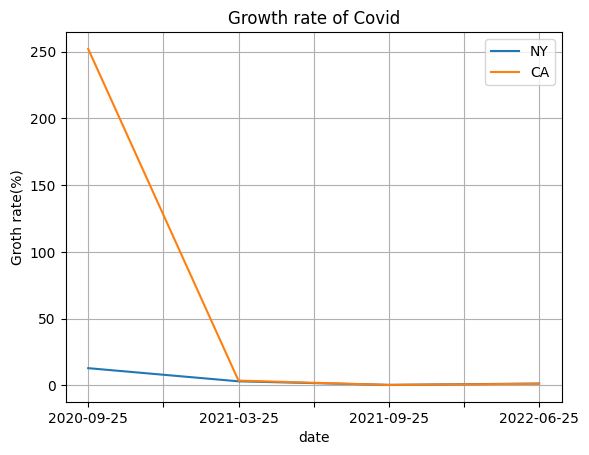

In [20]:
#analyzing data of dense and populated us states
#droping state column
state = cov_df.groupby(cov_df["state"])
ca = state.get_group('California')
ca.drop(["state"], inplace=True, axis=1)
ny = state.get_group('New York')
ny.drop(["state"], inplace=True, axis=1)
print(ca.head())
print(ny.head())

ny_rate = pd.DataFrame(columns = ['date', 'cases', 'deaths'])
ny_rate = ny.loc[ny['date'] == "2020-03-25"]
ny_rate = ny_rate.append(ny.loc[ny['date'] == "2020-09-25"], ignore_index = True)
ny_rate = ny_rate.append(ny.loc[ny['date'] == "2021-03-25"], ignore_index = True)
ny_rate = ny_rate.append(ny.loc[ny['date'] == "2021-09-25"], ignore_index = True)
ny_rate = ny_rate.append(ny.loc[ny['date'] == "2022-06-25"], ignore_index = True)

ca_rate = pd.DataFrame(columns = ['date', 'cases', 'deaths'])
ca_rate = ca.loc[ca['date'] == "2020-03-25"]
ca_rate = ca_rate.append(ca.loc[ca['date'] == "2020-09-25"], ignore_index = True)
ca_rate = ca_rate.append(ca.loc[ca['date'] == "2021-03-25"], ignore_index = True)
ca_rate = ca_rate.append(ca.loc[ca['date'] == "2021-09-25"], ignore_index = True)
ca_rate = ca_rate.append(ca.loc[ca['date'] == "2022-06-25"], ignore_index = True)

plt.yticks([1000.0,300000.0,3000000.0,5000000.0],["1000",'300000',"3000000","5000000"])
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Numbers")
df = ny_rate.set_index('date')
df['cases'].plot(label="NY_case")
df['deaths'].plot(label="Ny_death")
df1 = ca_rate.set_index('date')
df1['cases'].plot(label="CA_case")
df1['deaths'].plot(label="CA_death")
plt.legend()
plt.grid(True)
plt.show()

#calculating growth rate of covid
lst = []
lst_ny = []
lst_ca = []
lst.append(ny_rate["cases"])

#ny growth rate
for l in range(5):
    if l>0:
        n = (lst[0][l] - lst[0][l-1])/lst[0][l-1]
        lst_ny.append(n)
lst = []
lst.append(ca_rate["cases"])

#cali growth rate
for l in range(5):
    if l>0:
        n = (lst[0][l] - lst[0][l-1])/lst[0][l-1]
        lst_ca.append(n)

#including dates of growth rates
dates = ["2020-09-25", "2021-03-25", "2021-09-25", "2022-06-25"]
#showing growth rate
print(lst_ny)
print(lst_ca)
df_new = pd.DataFrame(columns = ['date', 'ny', 'ca'])
df_new['date'] = dates
df_new['ny'] = lst_ny
df_new['ca'] = lst_ca

#new dataframe values
print(df_new)

#graph of growth rate
plt.title("Growth rate of Covid")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Groth rate(%)")
df = df_new.set_index('date')
df['ny'].plot(label="NY")
df['ca'].plot(label="CA")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
file = open('covid_data.csv')
dataFrame = csv.reader(file)
header = next(dataFrame) 
print(header, "\n")

c_data = pd.read_csv('covid_data.csv')

#dropping unnecessary data
drop_data = ['None_Sympton','None_Experiencing','Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country']
c_data.drop(drop_data, inplace=True, axis=1)

#dividing dataframe into parts 
age = [ 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+']
gender = ['Gender_Male', 'Gender_Female', 'Gender_Transgender']
indicator = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea']
severity=['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']

age_data = c_data[age]
gender_data = c_data[gender]
indic_data = c_data[indicator]
severity_data = c_data[severity]

#information about covid data
print(indic_data.describe(), "\n")


['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country'] 

               Fever      Tiredness      Dry-Cough  Difficulty-in-Breathing  \
count  316800.000000  316800.000000  316800.000000            316800.000000   
mean        0.312500       0.500000       0.562500                 0.500000   
std         0.463513       0.500001       0.496079                 0.500001   
min         0.000000       0.000000       0.000000                 0.000000   
25%         0.000000       0.000000       0.000000                 0.000000   
50%         0.000000       0.500000       1.000000                 0.500000   
75%         1.000000     

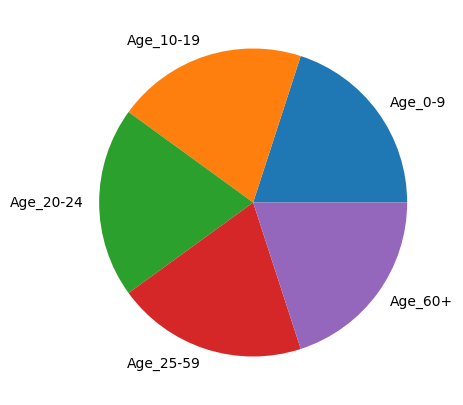

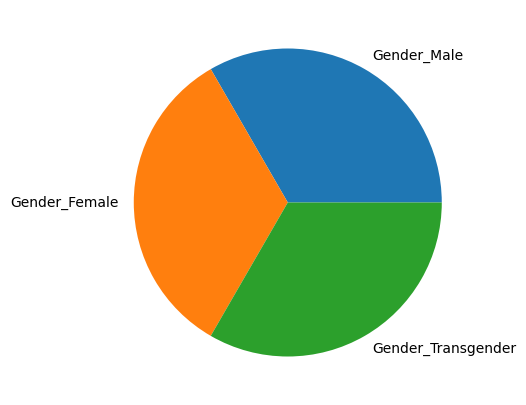

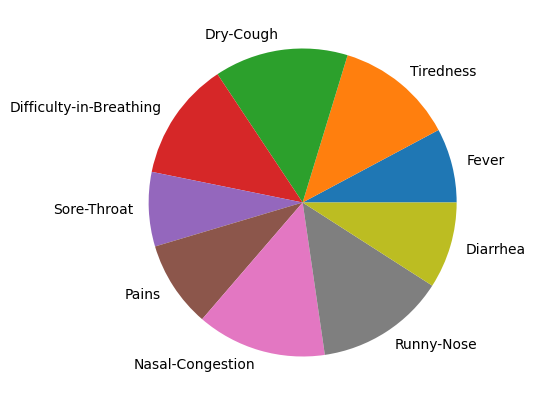

In [49]:
#visualizing age group
age_list = []
for i in age:
    age_list.append(sum(age_data[i].values))
age_df = pd.DataFrame({"age":age, "Age_list":age_list})
plt.figure(figsize = (5,5))
plt.pie(data=age_df, x="Age_list", labels=age_df["age"])

#visualizing gender group
gen_list = []
for i in gender:
    gen_list.append(sum(gender_data[i].values))
gen_df = pd.DataFrame({"Gender":gender, "Gender_list":gen_list})
plt.figure(figsize = (5,5))
plt.pie(data=gen_df, x="Gender_list", labels=gen_df["Gender"])

#visualizing indicator group
ind_list = []
for i in indicator:
    ind_list.append(sum(indic_data[i].values))
ind_df = pd.DataFrame({"Indicator":indicator, "Indicator_list":ind_list})
plt.figure(figsize = (5,5))
plt.pie(data=ind_df, x="Indicator_list", labels=ind_df["Indicator"])

plt.show()

C:\Users\Mirage~\AppData\Local\Temp\ipykernel_36120\1505070303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Severity']= df1['Severity_None']*0+df1['Severity_Mild']*1+df1['Severity_Moderate']*2+ df1['Severity_Severe']*3


   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  Pains  \
0      1          1          1                        1            1      1   
1      1          1          1                        1            1      1   
2      1          1          1                        1            1      1   
3      1          1          1                        1            1      1   
4      1          1          1                        1            1      1   

   Nasal-Congestion  Runny-Nose  Diarrhea  Severity_Mild  Severity_Moderate  \
0                 1           1         1              1                  0   
1                 1           1         1              1                  0   
2                 1           1         1              1                  0   
3                 1           1         1              0                  1   
4                 1           1         1              0                  1   

   Severity_None  Severity_Severe  Severity  
0   

C:\Users\Mirage~\AppData\Local\Temp\ipykernel_36120\1505070303.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(severity, inplace=True, axis=1)


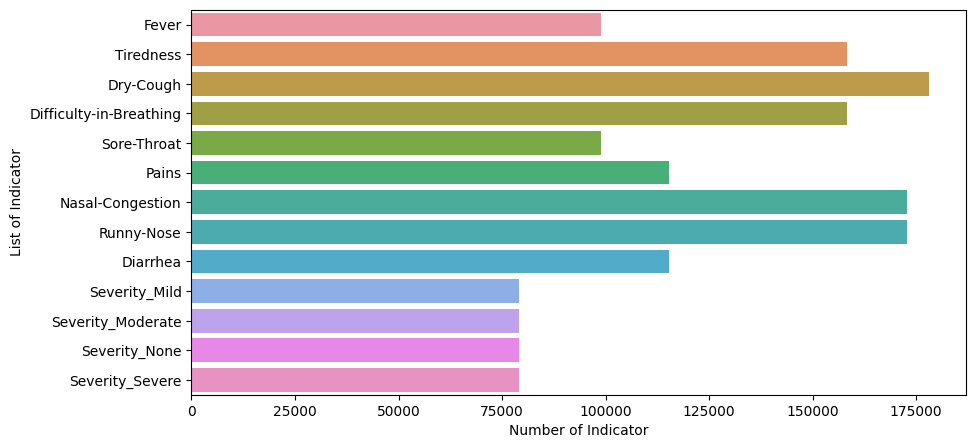

In [50]:
new_list = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea'
              ,'Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']
df1 = c_data[new_list]
df1['Severity']= df1['Severity_None']*0+df1['Severity_Mild']*1+df1['Severity_Moderate']*2+ df1['Severity_Severe']*3
print(df1.head())

#visualizing data of all the indicators to see which numuric difference between datas
plt.figure(figsize = (10 ,5))
list1 = []
for i in new_list:
    list1.append(sum(df1[i].values))
temp_df = pd.DataFrame({"List of Indicator": new_list, "Number of Indicator":list1})
sns.barplot(data = temp_df, y="List of Indicator", x="Number of Indicator")

#dropping severities cause all values united at "Severity"
df1.drop(severity, inplace=True, axis=1)

In [51]:
print(df1.head(), "\n")
X = df1.iloc[:, :-1].values
y = df1.iloc[:, 9].values

print("Training Cases: ")
print(X)
print("Classification Cases: ")
print(y)

   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  Pains  \
0      1          1          1                        1            1      1   
1      1          1          1                        1            1      1   
2      1          1          1                        1            1      1   
3      1          1          1                        1            1      1   
4      1          1          1                        1            1      1   

   Nasal-Congestion  Runny-Nose  Diarrhea  Severity  
0                 1           1         1         1  
1                 1           1         1         1  
2                 1           1         1         1  
3                 1           1         1         2  
4                 1           1         1         2   

Training Cases: 
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Cases: 
[1 1 1 ... 0 0 0]


In [54]:
#KNN implemtation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix:
[[7470 6701 5460 4148]
 [7396 6731 5445 4225]
 [7383 6791 5450 4216]
 [7443 6727 5290 4164]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.31      0.28     23779
           1       0.25      0.28      0.27     23797
           2       0.25      0.23      0.24     23840
           3       0.25      0.18      0.21     23624

    accuracy                           0.25     95040
   macro avg       0.25      0.25      0.25     95040
weighted avg       0.25      0.25      0.25     95040

Accuracy: 0.2505787037037037


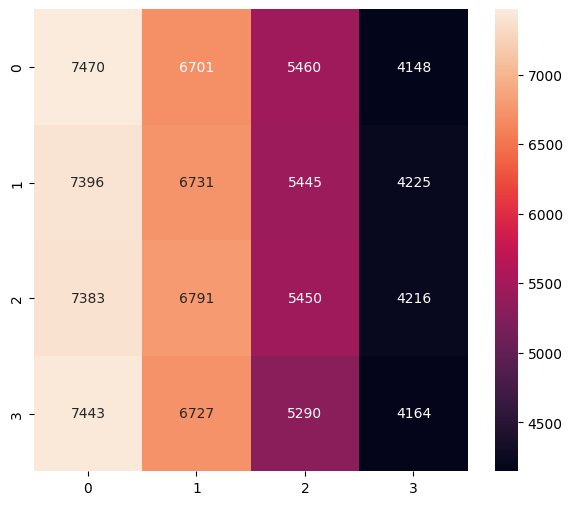

In [55]:
#Result data
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

labels = sorted(list(set(y_test)))
cmx_data = confusion_matrix(y_test, y_pred, labels=labels)
    
df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
ax.set_ylim(len(set(y_test)), 0)
plt.show()